<a href="https://colab.research.google.com/github/Josepholaidepetro/Volve_ML/blob/main/FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [2]:
from google.colab import files
files.upload()

Saving formation_eval.py to formation_eval.py


{'formation_eval.py': b'"""\r\nformation evaluation\r\nAuthor: Olaide Joseph\r\nEmail: Josepholaide10@gmail.com\r\n"""\r\n\r\nimport lasio\r\nimport numpy as np\r\nimport matplotlib.pyplot as plt\r\nimport pandas as pd\r\nimport matplotlib.ticker as ticker\r\nimport warnings\r\nplt.style.use(\'ggplot\')\r\nwarnings.filterwarnings("ignore")\r\n\r\n\r\nclass formation_eval:\r\n    """\r\n        Evaluates the formation and determines formation characteristic such as shale volume,\r\n        reservoir and non-reservoir zones.\r\n        args::\r\n            datapath: LAS datapath\r\n            mnemonics: list of well log mnemonics, if \'None\', density, neutron, Gamma ray, SP and resistivity\r\n            logs are passed if available.\r\n        """\r\n\r\n    def __init__(self, datapath: str = None, mnemonics: list = None):\r\n        """\r\n\r\n        :type datapath: str\r\n        :type mnemonics: list\r\n\r\n        """\r\n        if mnemonics is None:\r\n            self.mnemonic

In [4]:
!git clone https://gitlab.com/josepholaide10/petroleum-exploration-suite.git

Cloning into 'petroleum-exploration-suite'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 35 (delta 9), reused 3 (delta 0), pack-reused 0
Unpacking objects: 100% (35/35), done.


In [3]:
import sys
import os
import lasio
import warnings

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker
import seaborn as sns
sns.set_style('darkgrid')
sys.path.append('/content/petroleum-exploration-suite/Formation_evaluation/formation_evaluation.py')
warnings.filterwarnings("ignore")
%matplotlib inline

# File Path

In [12]:
def get_file(path):
  files=os.listdir(path)
  train_files = sorted([os.path.join(path, f) for f in files if 'LAS' in f])
  return train_files

train_dir = '/content/petroleum-exploration-suite/data'
train_files = get_file(train_dir)

In [13]:
train_files

['/content/petroleum-exploration-suite/data/15_9-F-1A.LAS',
 '/content/petroleum-exploration-suite/data/15_9-F-1B.LAS']

In [14]:
def to_dataframe(files):
  df_well = []
  df_keys = []
  df_cuvs = []
  for file in files:
      df = lasio.read(file)
      df_keys.append(df.keys())
      df_cuvs.append(df.curves)
      well = df.df()
      well.reset_index(inplace=True)
      df_well.append(well)
  return df_well, df_keys, df_cuvs


df_well, df_keys, df_cuvs = to_dataframe(train_files) 

well1, well2 = df_well

# Dataframe keys and curves

In [15]:
for i in df_keys:
  print(i)

['DEPTH', 'ABDCQF01', 'ABDCQF02', 'ABDCQF03', 'ABDCQF04', 'BS', 'CALI', 'DRHO', 'DT', 'DTS', 'GR', 'NPHI', 'PEF', 'RACEHM', 'RACELM', 'RHOB', 'ROP', 'RPCEHM', 'RPCELM', 'RT']
['DEPTH', 'ABDCQF01', 'ABDCQF02', 'ABDCQF03', 'ABDCQF04', 'BS', 'CALI', 'DRHO', 'DT', 'DTS', 'GR', 'NBGRCFM', 'NPHI', 'PEF', 'RACEHM', 'RACELM', 'RD', 'RHOB', 'RM', 'ROP', 'RPCEHM', 'RPCELM', 'RT']


In [16]:
df_cuvs[0]

[CurveItem(mnemonic="DEPTH", unit="M", value="00 001 00 00", descr="0  Depth", original_mnemonic="DEPTH", data.shape=(35361,)),
 CurveItem(mnemonic="ABDCQF01", unit="g/cm3", value="00 000 00 00:   1  ABDCQF01:COMPOSITE:rC:0001", descr="v1", original_mnemonic="ABDCQF01", data.shape=(35361,)),
 CurveItem(mnemonic="ABDCQF02", unit="g/cm3", value="00 000 00 00:   2  ABDCQF02:COMPOSITE:rC:0001", descr="v1", original_mnemonic="ABDCQF02", data.shape=(35361,)),
 CurveItem(mnemonic="ABDCQF03", unit="g/cm3", value="00 000 00 00:   3  ABDCQF03:COMPOSITE:rC:0001", descr="v1", original_mnemonic="ABDCQF03", data.shape=(35361,)),
 CurveItem(mnemonic="ABDCQF04", unit="g/cm3", value="00 000 00 00:   4  ABDCQF04:COMPOSITE:rC:0001", descr="v1", original_mnemonic="ABDCQF04", data.shape=(35361,)),
 CurveItem(mnemonic="BS", unit="inches", value="00 000 00 00:   5  BS:COMPOSITE:rC:NONE", descr="v1", original_mnemonic="BS", data.shape=(35361,)),
 CurveItem(mnemonic="CALI", unit="inches", value="70 280 00 01: 

# Importing Formation Evaluation Module

In [17]:
from formation_eval import formation_eval
formation_eval1 = formation_eval(datapath=None, mnemonics=None)

The module takes a particular amount of logs for evaluation, usually the important ones

In [19]:
df_well1 = []
for i in range(len(df_well)):
    df = formation_eval1.well_logs(dataframe=df_well[i])
    df_well1.append(df)
    
well1, well2 = df_well1

In [20]:
for i in range(len(df_well1)):
  print('well' + str(i))
  print(df_well1[i].isnull().sum())
  print('\n')

well0
DEPTH        0
ROP        884
GR         690
CALI     24616
BS           0
RT        1150
NPHI     24837
RHOB     24810
DRHO     24714
DT       25137
PEF      24810
dtype: int64


well1
DEPTH        0
ROP        807
GR         693
CALI     29672
BS           0
RD        1281
RT       24653
RM        1281
NPHI     29778
RHOB     29750
DRHO     29665
DT       28929
PEF      29750
dtype: int64




In [21]:
for i in range(len(df_well1)):
  print('well' + str(i))
  print(df_well1[i].shape)
  print('\n')

well0
(35361, 11)


well1
(33191, 13)




In [24]:
def intersection(lst1, lst2): 
    lst3 = [value for value in lst1 if value not in lst2] 
    return lst3 

intersection(df_keys[0], df_keys[1])

[]

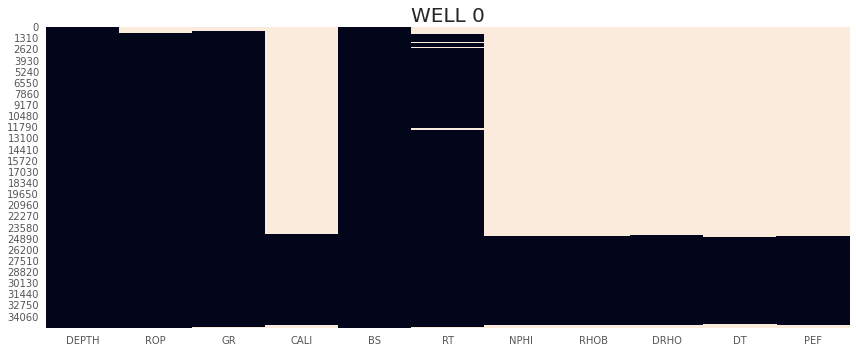

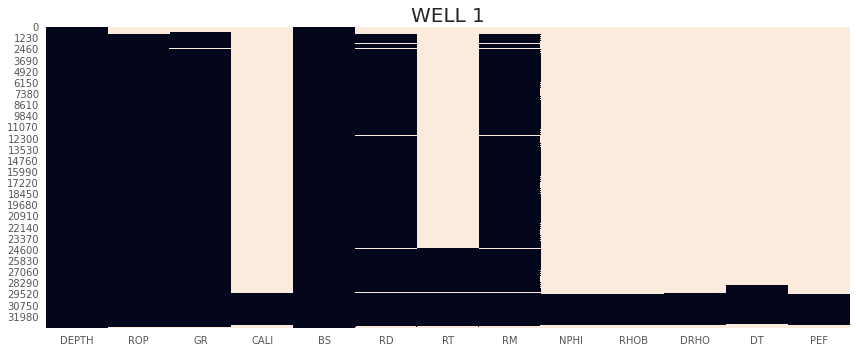

In [25]:
for i in range(len(df_well)):
  plt.figure(figsize=(12,5))
  sns.heatmap(df_well1[i].isnull(), cbar=False)
  plt.title("WELL {}".format(i), size=20)
  plt.tight_layout()
  plt.show()

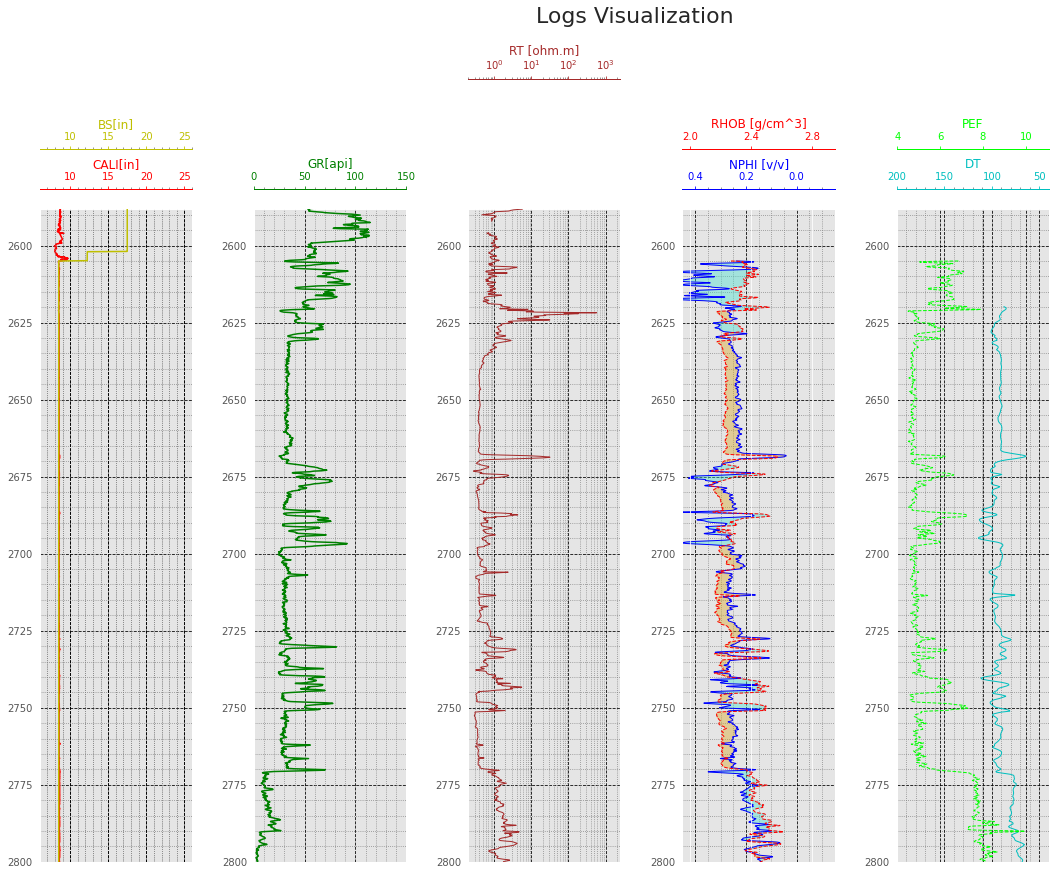

In [26]:
formation_eval1.log_viz(well1,2588, 2800, plotsize=(18,12))

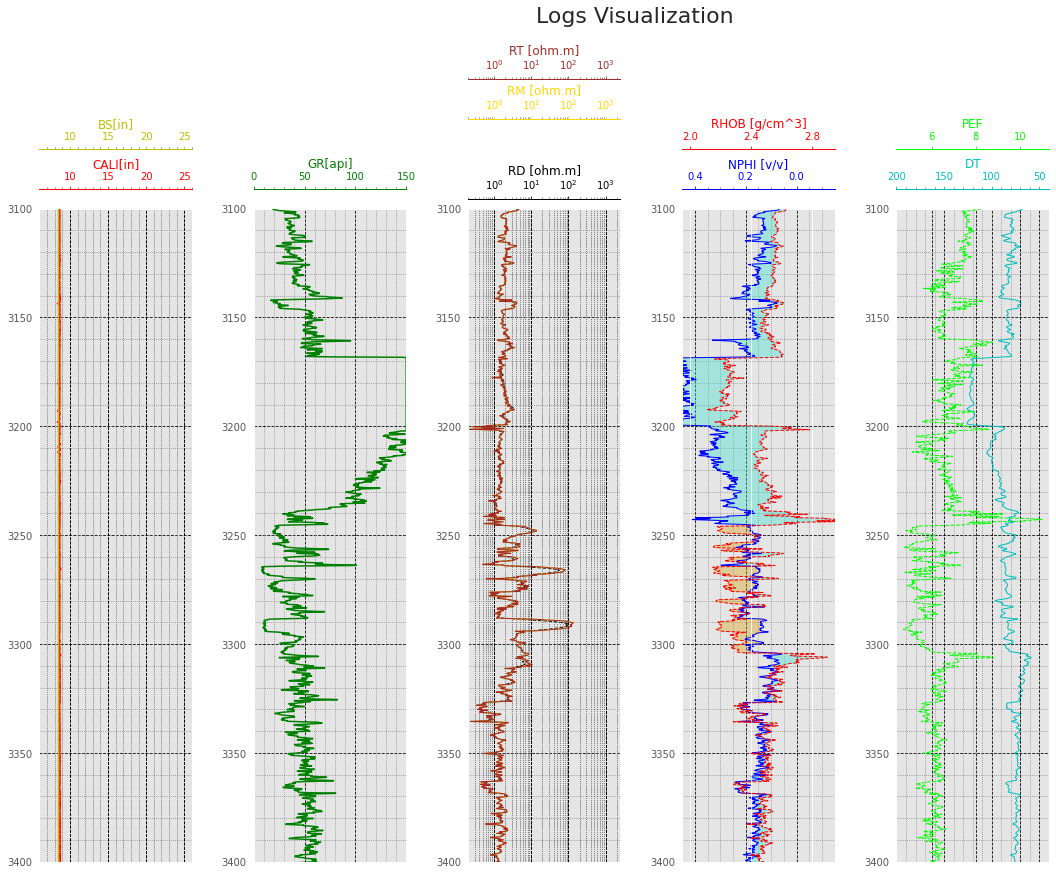

In [27]:
formation_eval1.log_viz(well2,3100, 3400, plotsize=(18,12))

# Using the doub_logplot method

In [28]:
well2.columns

Index(['DEPTH', 'ROP', 'GR', 'CALI', 'BS', 'RD', 'RT', 'RM', 'NPHI', 'RHOB',
       'DRHO', 'DT', 'PEF'],
      dtype='object')

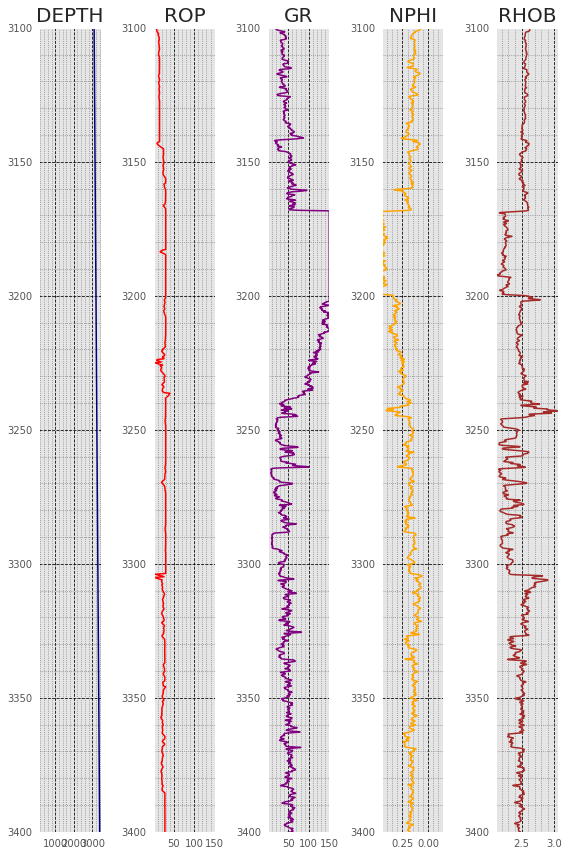

In [30]:
formation_eval1.doub_logplot(well2, logs=['DEPTH', 'ROP', 'GR', 'NPHI', 'RHOB'], \
                             min_depth=3100, max_depth=3400,\
                             plotsize=(8,12))
plt.savefig('preddt')

# Using the triple_combo_plot method

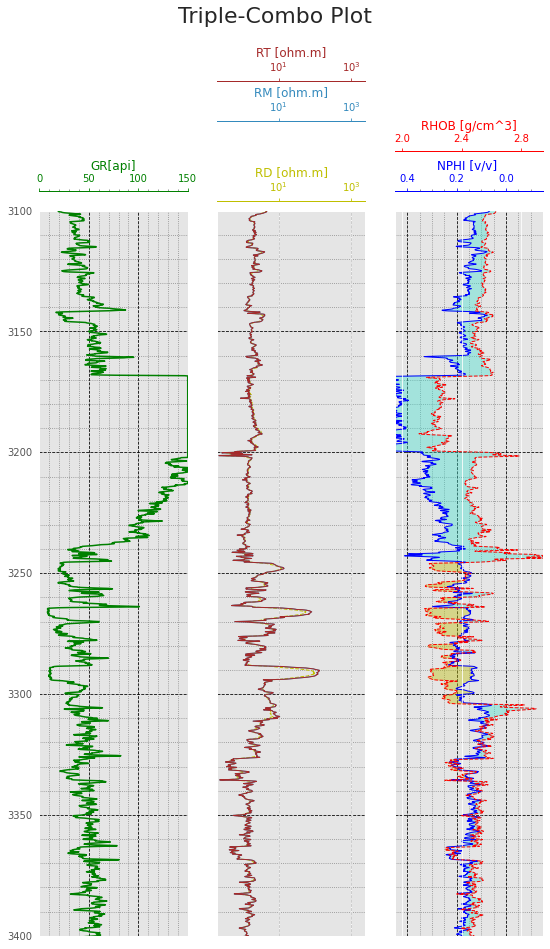

In [36]:
formation_eval1.triple_combo_plot(well2,3100, 3400, plotsize=(8,13))

plt.savefig('preddt')